In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
#import extracted reviews dataset from amazon using scrapy
reviews=pd.read_csv('extract_reviews.csv')
reviews

stars                                            comment
0     1.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  Don’t buy ...
1     4.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  Let’s make...
2     5.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  Awesome\n\...
3     1.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  Don’t buy ...
4     1.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  Don’t buy ...
...                  ...                                                ...
1195  4.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  i didn't u...
1196  5.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  Good produ...
1197  1.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  This phone...
1198  5.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  Good mobil...
1199  3.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n  \n  \n    \n  Processor ...

[1200 rows x 2 columns]

In [4]:
#text processing
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Don’t buy this product .Image quality is below average comparing with the specification. Useless camera.And there is NO RETURN POLICY and replacing with same mobile is big headache .DON’T buy this mobile',
 'Let’s make one thing clear immediately: the Xiaomi Redmi 9 is a phone with flaws, and it has a lot of them. On the other hand, it is one of the most affordable phones available anywhere right now, and it\'s hard to find a better phone at this price point.The screen is of barely acceptable quality, the camera is disappointing, and the performance is middling at best, and yet, the Redmi 9 counters these with its superb design, good feature set, long battery life, and finally, the biggest ace in its sleeve — the ultra-affordable pricing. Let that sink in — the Redmi 9 starts at less than 9000, This alone offsets all of the flaws that the phone has in store for us. Or does it? Let\'s look at the the many, many corners that have been cut to achieve this pricing🇩\xa0🇪\xa0🇸\xa0🇮\xa0🇬\xa

In [5]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'Don’t buy this product .Image quality is below average comparing with the specification. Useless camera.And there is NO RETURN POLICY and replacing with same mobile is big headache .DON’T buy this mobile Let’s make one thing clear immediately: the Xiaomi Redmi 9 is a phone with flaws, and it has a lot of them. On the other hand, it is one of the most affordable phones available anywhere right now, and it\'s hard to find a better phone at this price point.The screen is of barely acceptable quality, the camera is disappointing, and the performance is middling at best, and yet, the Redmi 9 counters these with its superb design, good feature set, long battery life, and finally, the biggest ace in its sleeve — the ultra-affordable pricing. Let that sink in — the Redmi 9 starts at less than 9000, This alone offsets all of the flaws that the phone has in store for us. Or does it? Let\'s look at the the many, many corners that have been cut to achieve this pricing🇩\xa0🇪\xa0🇸\xa0🇮\xa0🇬\xa0🇳\xa

In [6]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text


'Don’t buy this product Image quality is below average comparing with the specification Useless cameraAnd there is NO RETURN POLICY and replacing with same mobile is big headache DON’T buy this mobile Let’s make one thing clear immediately the Xiaomi Redmi 9 is a phone with flaws and it has a lot of them On the other hand it is one of the most affordable phones available anywhere right now and its hard to find a better phone at this price pointThe screen is of barely acceptable quality the camera is disappointing and the performance is middling at best and yet the Redmi 9 counters these with its superb design good feature set long battery life and finally the biggest ace in its sleeve — the ultraaffordable pricing Let that sink in — the Redmi 9 starts at less than 9000 This alone offsets all of the flaws that the phone has in store for us Or does it Lets look at the the many many corners that have been cut to achieve this pricing🇩\xa0🇪\xa0🇸\xa0🇮\xa0🇬\xa0🇳\xa0Plastic is fantastic especi

In [7]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\SATHISH KUMAR
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SATHISH KUMAR
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

['Don', '’', 't', 'buy', 'this', 'product', 'Image', 'quality', 'is', 'below', 'average', 'comparing', 'with', 'the', 'specification', 'Useless', 'cameraAnd', 'there', 'is', 'NO', 'RETURN', 'POLICY', 'and', 'replacing', 'with', 'same', 'mobile', 'is', 'big', 'headache', 'DON', '’', 'T', 'buy', 'this', 'mobile', 'Let', '’', 's', 'make', 'one', 'thing', 'clear', 'immediately', 'the', 'Xiaomi', 'Redmi', '9', 'is', 'a']


108120

In [11]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['with','this','is']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Don', '’', 'buy', 'product', 'Image', 'quality', 'average', 'comparing', 'specification', 'Useless', 'cameraAnd', 'NO', 'RETURN', 'POLICY', 'replacing', 'mobile', 'big', 'headache', 'DON', '’', 'T', 'buy', 'mobile', 'Let', '’', 'make', 'one', 'thing', 'clear', 'immediately', 'Xiaomi', 'Redmi', '9', 'phone', 'flaws', 'lot', 'On', 'hand', 'one', 'affordable', 'phones', 'available', 'anywhere', 'right', 'hard', 'find', 'better', 'phone', 'price', 'pointThe', 'screen', 'barely', 'acceptable', 'quality', 'camera', 'disappointing', 'performance', 'middling', 'best', 'yet', 'Redmi', '9', 'counters', 'superb', 'design', 'good', 'feature', 'set', 'long', 'battery', 'life', 'finally', 'biggest', 'ace', 'sleeve', '—', 'ultraaffordable', 'pricing', 'Let', 'sink', '—', 'Redmi', '9', 'starts', 'less', '9000', 'This', 'alone', 'offsets', 'flaws', 'phone', 'store', 'us', 'Or', 'Lets', 'look', 'many', 'many', 'corners', 'cut', 'achieve', 'pricing🇩', '🇪', '🇸', '🇮', '🇬', '🇳', 'Plastic', 'fantastic', 'e

In [12]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['don', '’', 'buy', 'product', 'image', 'quality', 'average', 'comparing', 'specification', 'useless', 'cameraand', 'no', 'return', 'policy', 'replacing', 'mobile', 'big', 'headache', 'don', '’', 't', 'buy', 'mobile', 'let', '’', 'make', 'one', 'thing', 'clear', 'immediately', 'xiaomi', 'redmi', '9', 'phone', 'flaws', 'lot', 'on', 'hand', 'one', 'affordable', 'phones', 'available', 'anywhere', 'right', 'hard', 'find', 'better', 'phone', 'price', 'pointthe', 'screen', 'barely', 'acceptable', 'quality', 'camera', 'disappointing', 'performance', 'middling', 'best', 'yet', 'redmi', '9', 'counters', 'superb', 'design', 'good', 'feature', 'set', 'long', 'battery', 'life', 'finally', 'biggest', 'ace', 'sleeve', '—', 'ultraaffordable', 'pricing', 'let', 'sink', '—', 'redmi', '9', 'starts', 'less', '9000', 'this', 'alone', 'offsets', 'flaws', 'phone', 'store', 'us', 'or', 'lets', 'look', 'many', 'many', 'corners', 'cut', 'achieve', 'pricing🇩', '🇪', '🇸', '🇮', '🇬', '🇳', 'plastic', 'fantastic', 'e

In [13]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['don', '’', 'buy', 'product', 'imag', 'qualiti', 'averag', 'compar', 'specif', 'useless', 'cameraand', 'no', 'return', 'polici', 'replac', 'mobil', 'big', 'headach', 'don', '’', 't', 'buy', 'mobil', 'let', '’', 'make', 'one', 'thing', 'clear', 'immedi', 'xiaomi', 'redmi', '9', 'phone', 'flaw', 'lot', 'on', 'hand', 'one', 'afford', 'phone', 'avail', 'anywher', 'right', 'hard', 'find', 'better', 'phone', 'price', 'pointth', 'screen', 'bare', 'accept', 'qualiti', 'camera', 'disappoint', 'perform', 'middl', 'best', 'yet', 'redmi', '9', 'counter', 'superb', 'design', 'good', 'featur', 'set', 'long', 'batteri', 'life', 'final', 'biggest', 'ace', 'sleev', '—', 'ultraafford', 'price', 'let', 'sink', '—', 'redmi', '9', 'start', 'less', '9000', 'thi', 'alon', 'offset', 'flaw', 'phone', 'store', 'us', 'or', 'let', 'look', 'mani', 'mani', 'corner', 'cut', 'achiev', 'pricing🇩', '🇪', '🇸', '🇮', '🇬', '🇳', 'plastic', 'fantast', 'especi', 'afford', 'phone', 'redmi', '9', 'prove', 'the', 'textur', 'back

In [14]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

don ’ buy product image quality average comparing specification useless cameraand no return policy replacing mobile big headache don ’ t buy mobile let ’ make one thing clear immediately xiaomi redmi 9 phone flaws lot on hand one affordable phones available anywhere right hard find better phone price pointthe screen barely acceptable quality camera disappointing performance middling best yet redmi 9 counters superb design good feature set long battery life finally biggest ace sleeve — ultraaffordable pricing let sink — redmi 9 starts less 9000 this alone offsets flaws phone store us or lets look many many corners cut achieve pricing🇩 🇪 🇸 🇮 🇬 🇳 plastic fantastic especially affordable phones redmi 9 proves the textured back redmi 9 feels great hand provides excellent grip used naked though i ’ still recommend putting case i actually quite like textured back device helps grip also adds certain cool factor device i zero issues fact im touching plastic what ’ plastic keeps weight 200 grams 

In [15]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['don', "'", 'buy', 'product', 'image', 'quality', 'average', 'compare', 'specification', 'useless', 'cameraand', 'no', 'return', 'policy', 'replace', 'mobile', 'big', 'headache', 'don', "'", 't', 'buy', 'mobile', 'let', "'", 'make', 'one', 'thing', 'clear', 'immediately', 'xiaomi', 'redmi', '9', 'phone', 'flaw', 'lot', 'on', 'hand', 'one', 'affordable', 'phone', 'available', 'anywhere', 'right', 'hard', 'find', 'well', 'phone', 'price', 'pointthe', 'screen', 'barely', 'acceptable', 'quality', 'camera', 'disappointing', 'performance', 'middle', 'good', 'yet', 'redmi', '9', 'counter', 'superb', 'design', 'good', 'feature', 'set', 'long', 'battery', 'life', 'finally', 'big', 'ace', 'sleeve', '—', 'ultraaffordable', 'pricing', 'let', 'sink', '—', 'redmi', '9', 'start', 'less', '9000', 'this', 'alone', 'offset', 'flaw', 'phone', 'store', 'we', 'or', 'let', 'look', 'many', 'many', 'corner', 'cut', 'achieve', 'pricing', '🇩', '🇪', '🇸', '🇮', '🇬', '🇳', 'plastic', 'fantastic', 'especially', 'aff

In [16]:
clean_reviews=' '.join(lemmas)
clean_reviews

"don ' buy product image quality average compare specification useless cameraand no return policy replace mobile big headache don ' t buy mobile let ' make one thing clear immediately xiaomi redmi 9 phone flaw lot on hand one affordable phone available anywhere right hard find well phone price pointthe screen barely acceptable quality camera disappointing performance middle good yet redmi 9 counter superb design good feature set long battery life finally big ace sleeve — ultraaffordable pricing let sink — redmi 9 start less 9000 this alone offset flaw phone store we or let look many many corner cut achieve pricing 🇩 🇪 🇸 🇮 🇬 🇳 plastic fantastic especially affordable phone redmi 9 prove the texture back redmi 9 feel great hand provide excellent grip use naked though I ’ still recommend put case I actually quite like textured back device help grip also add certain cool factor device I zero issue fact I m touch plastic what ' plastic keep weight 200 gram admirable large device humongous 50

Feature extraction
1.Using CountVectroizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [18]:
print(cv.vocabulary_)

{'don': 96, 'buy': 61, 'product': 223, 'image': 147, 'quality': 228, 'average': 43, 'compare': 74, 'specification': 259, 'useless': 289, 'cameraand': 63, 'no': 188, 'return': 241, 'policy': 216, 'replace': 237, 'mobile': 183, 'big': 51, 'headache': 140, 'let': 163, 'make': 174, 'one': 196, 'thing': 276, 'clear': 70, 'immediately': 149, 'xiaomi': 305, 'redmi': 236, 'phone': 207, 'flaw': 123, 'lot': 170, 'on': 195, 'hand': 135, 'affordable': 32, 'available': 42, 'anywhere': 39, 'right': 242, 'hard': 137, 'find': 120, 'well': 299, 'price': 218, 'pointthe': 215, 'screen': 244, 'barely': 48, 'acceptable': 25, 'camera': 62, 'disappointing': 93, 'performance': 204, 'middle': 180, 'good': 130, 'yet': 306, 'counter': 79, 'superb': 267, 'design': 85, 'feature': 116, 'set': 251, 'long': 167, 'battery': 49, 'life': 164, 'finally': 119, 'ace': 26, 'sleeve': 254, 'ultraaffordable': 284, 'pricing': 219, 'sink': 253, 'start': 261, 'less': 162, '9000': 24, 'this': 277, 'alone': 34, 'offset': 192, 'stor

In [19]:
print(cv.get_feature_names()[150:300])

['in', 'include', 'indiathe', 'issue', 'joy', 'keep', 'lackluster', 'large', 'last', 'launch', 'lcd', 'leave', 'less', 'let', 'life', 'light', 'like', 'long', 'look', 'lookwise', 'lot', 'low', 'macro', 'main', 'make', 'many', 'mark', 'marketif', 'megapixel', 'merely', 'middle', 'minute', 'miui', 'mobile', 'money', 'moneyit', 'naked', 'need', 'no', 'notch', 'note', 'nt', 'offset', 'ok', 'okthe', 'on', 'one', 'opinionin', 'option', 'or', 'order', 'overall', 'panel', 'per', 'performance', 'permanently', 'personally', 'phone', 'phone12', 'phonebattery', 'phoneif', 'phonethe', 'photo', 'photography', 'plastic', 'pointthe', 'policy', 'pretty', 'price', 'pricing', 'prime', 'pro', 'processor', 'product', 'prove', 'provide', 'purchase', 'put', 'quality', 'qualitysometime', 'quite', 'ram', 'range', 'really', 'reason', 'recommend', 'redmi', 'replace', 'resolution', 'rest', 'result', 'return', 'right', 'rs', 'screen', 'see', 'segment', 'self', 'selfie', 'sen', 'sensor', 'set', 'shoot', 'sink', 'sl

In [20]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
print(reviewscv.toarray().shape)

(67560, 311)


2. CountVectorizer with N-grams

In [22]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [23]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['2mp', '5020mah', '8mp', '9000', 'affordable', 'also', 'amazon', 'available', 'average', 'back', 'bad', 'battery', 'big', 'bright', 'buy', 'camera', 'design', 'device', 'disappointing', 'display', 'do', 'don', 'downgrade', 'enough', 'experience', 'feel', 'flaw', 'gb', 'get', 'go', 'good', 'grip', 'hand', 'hard', 'hour', 'issue', 'large', 'last', 'let', 'like', 'long', 'look', 'lot', 'low', 'many', 'merely', 'middle', 'minute', 'miui', 'mobile', 'money', 'moneyit', 'naked', 'need', 'no', 'notch', 'note', 'nt', 'offset', 'ok', 'okthe', 'on', 'one', 'personally', 'phone', 'phoneif', 'phonethe', 'photo', 'photography', 'plastic', 'pointthe', 'policy', 'pretty', 'price', 'pricing', 'prime', 'pro', 'product', 'quality', 'ram', 'redmi', 'return', 'see', 'slow', 'still', 'take', 'the', 'there', 'this', 'time', 'top', 'use', 'value', 'very', 'video', 'want', 'watch', 'we', 'well', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0

3.TF-IDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [25]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '1080p', '10w', '13mp', '14', '168', '1display', '200', '2020', '2gbi', '2mp', '2x', '30fps', '353fe', '355build', '3755back', '3gp', '452cam', '4554processor', '48', '5020mah', '5mp', '653inch', '8mp', '9000', 'acceptable', 'ace', 'achieve', 'actually', 'ad', 'add', 'admirable', 'affordable', 'ahead', 'alone', 'also', 'amazing', 'amazon', 'and', 'anywhere', 'app', 'assure', 'available', 'average', 'awesome', 'back', 'backup', 'bad', 'barely', 'battery', 'beginner', 'big', 'bit', 'bleak', 'bloatware', 'body', 'box', 'bright', 'brightness', 'budget', 'but', 'buy', 'camera', 'cameraand', 'camerarecently', 'case', 'certain', 'charge', 'charger', 'cheap', 'clear', 'color', 'combined', 'come', 'compare', 'complaint', 'contrast', 'cool', 'corner', 'counter', 'coz', 'custom', 'cut', 'day', 'depth', 'design', 'despite', 'device', 'diagonal', 'difficult', 'digital', 'dimension', 'disappoint', 'disappointing', 'display', 'do', 'don', 'downgrade', 'drain', 'early', 'efficient', 'else', 'en

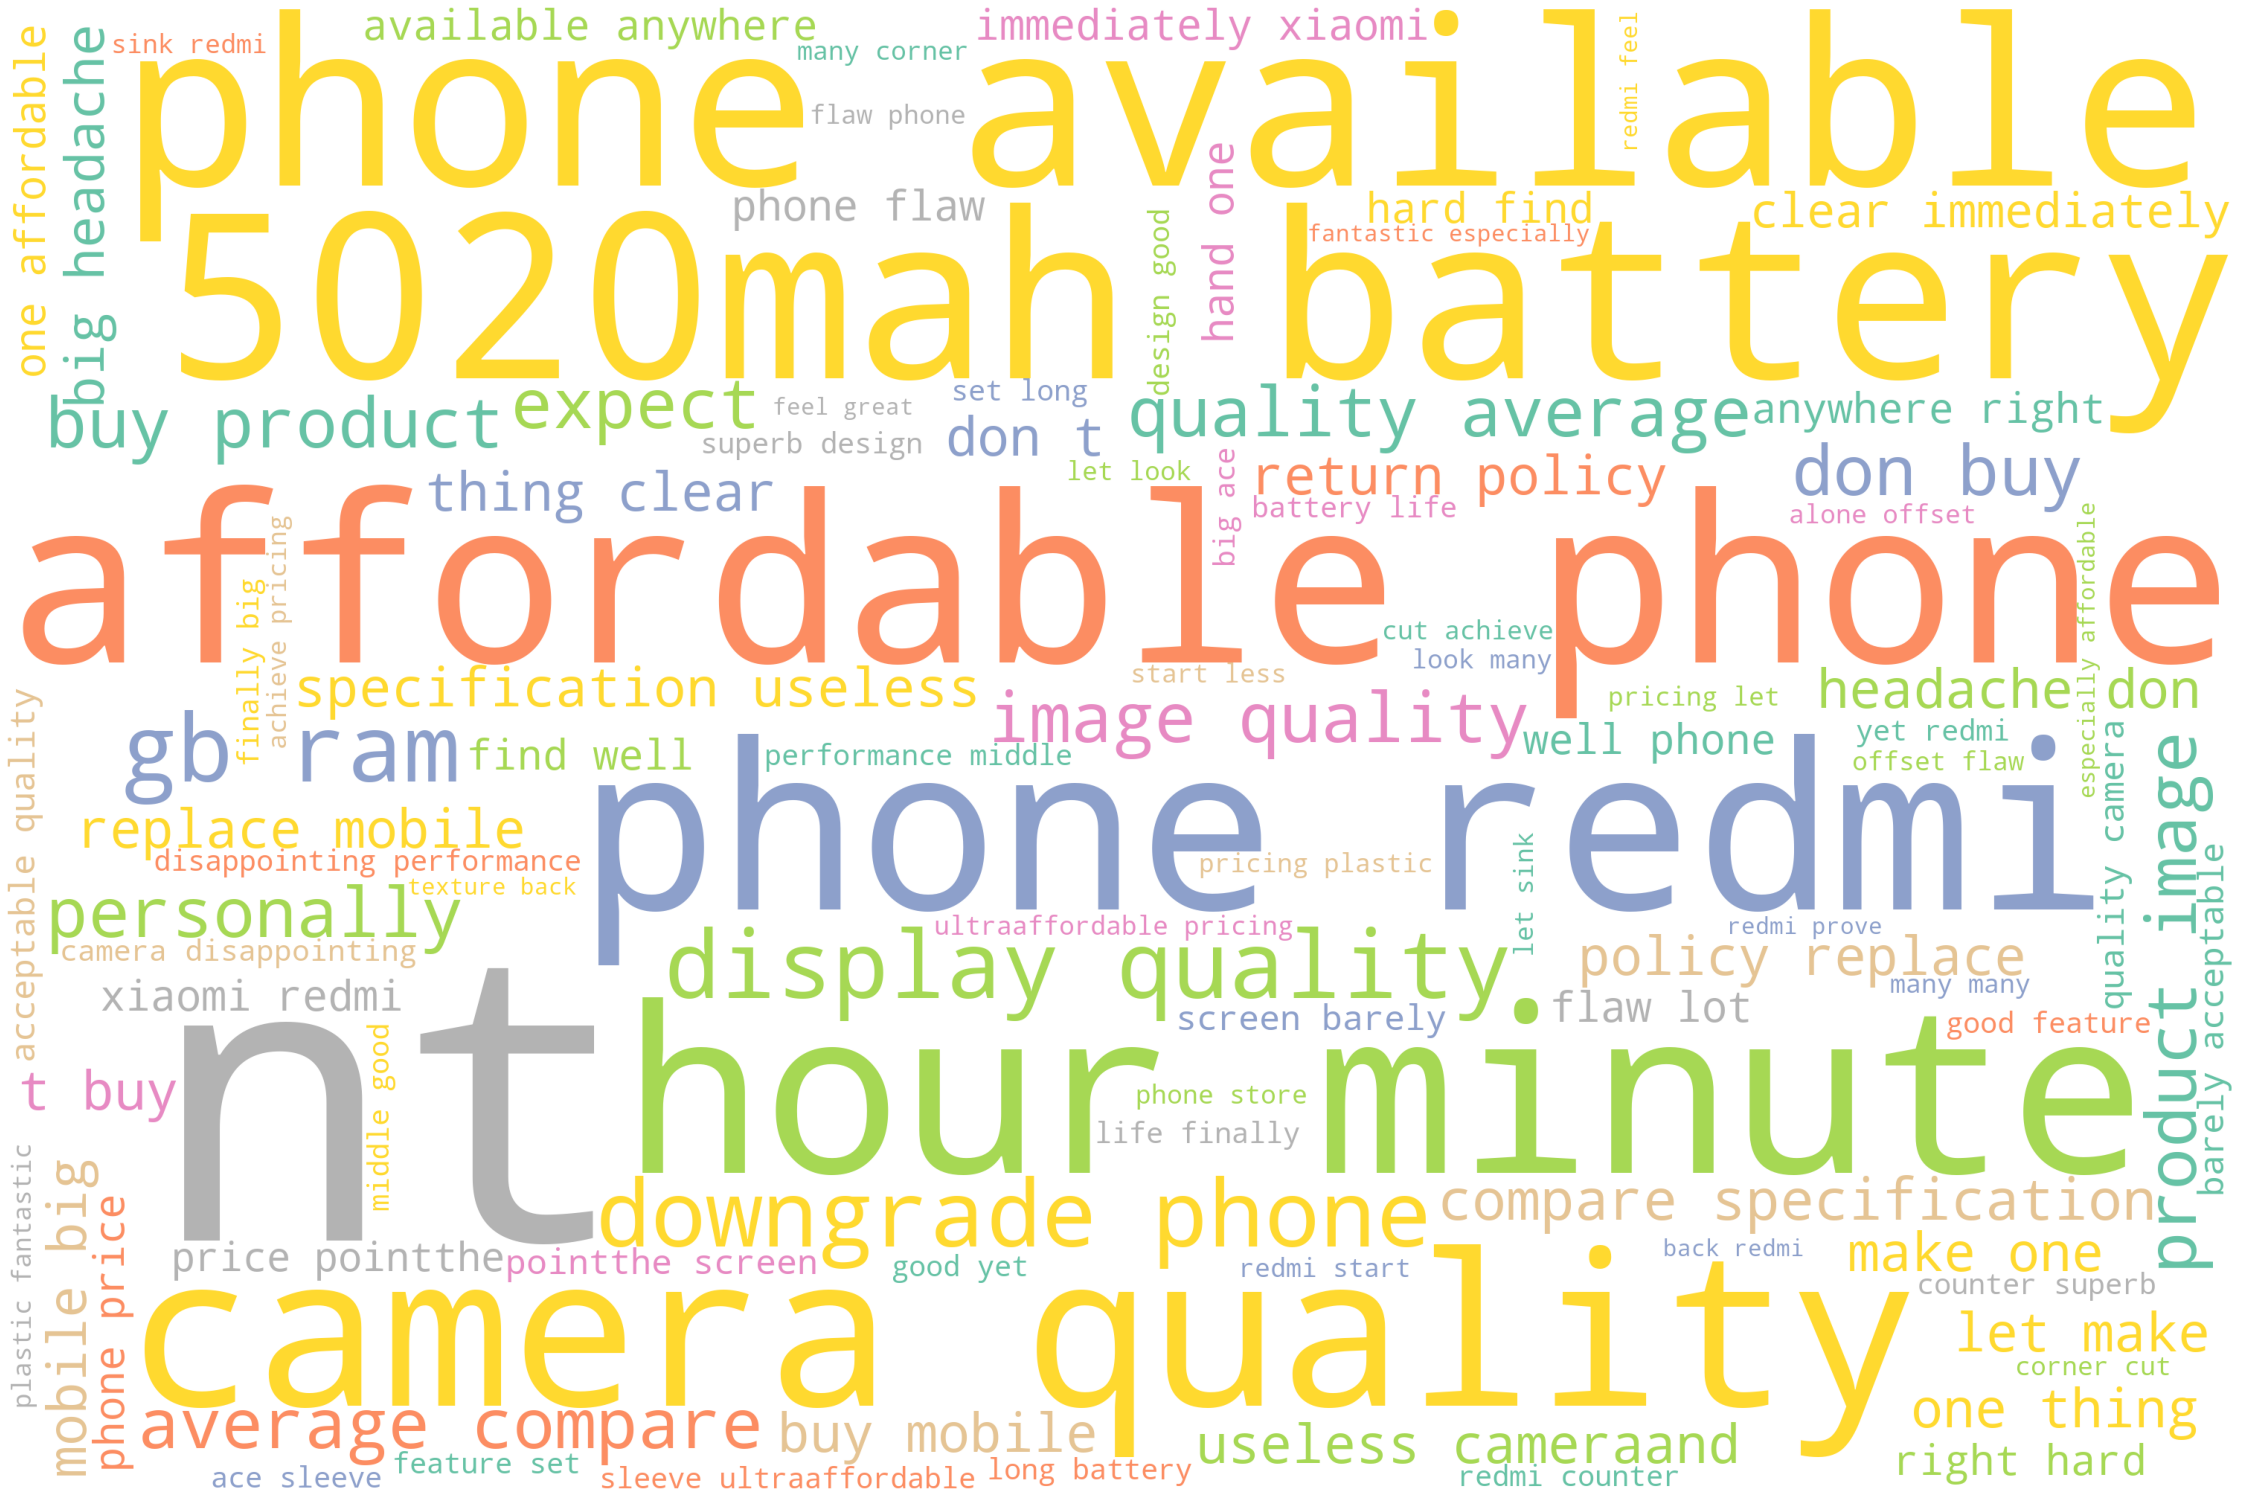

In [26]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

Named Entity Recoginition(NER)

In [27]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[100:200]:
    print(token,token.pos_)

achieve VERB
pricing NOUN
🇩 NOUN
🇪 PROPN
🇸 PROPN
🇮 PROPN
🇬 NOUN
🇳 VERB
plastic NOUN
fantastic NOUN
especially ADV
affordable ADJ
phone NOUN
redmi NOUN
9 NUM
prove VERB
the DET
texture NOUN
back ADP
redmi PROPN
9 NUM
feel VERB
great ADJ
hand NOUN
provide VERB
excellent ADJ
grip NOUN
use NOUN
naked ADJ
though SCONJ
I PRON
’ AUX
still ADV
recommend VERB
put NOUN
case NOUN
I PRON
actually ADV
quite ADV
like INTJ
textured ADJ
back ADJ
device NOUN
help NOUN
grip NOUN
also ADV
add VERB
certain ADJ
cool ADJ
factor NOUN
device NOUN
I PRON
zero NUM
issue NOUN
fact NOUN
I PRON
m VERB
touch VERB
plastic NOUN
what PRON
' PUNCT
plastic NOUN
keep VERB
weight NOUN
200 NUM
gram NOUN
admirable ADJ
large ADJ
device NOUN
humongous ADJ
5020mah NOUN
battery NOUN
don NOUN
' PUNCT
get VERB
wrong ADJ
' PUNCT
still ADV
big ADJ
heavy ADJ
phone NOUN
' PUNCT
strike NOUN
overall ADJ
redmi PROPN
9 NUM
joy NOUN
handle NOUN
despite SCONJ
large ADJ
dimension NOUN
🇩 NOUN
🇮 PROPN
🇸 PROPN
🇵 NUM
🇱 PROPN
🇦 PROPN
🇾 NOUN
the 

In [29]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['🇾', 'display', 'redmi', 'resolution', 'sufficient', 'lcd', 'fhd', 'display', 'color', 'brightness', 'contrast', 'display', '’', 'enjoy', 'time', 'phone', 'time', 'sunlight', '🆈', 'battery', 'backup', 'redmi', 'phone', 'hardware', '5020mah', 'battery', 'take', 'drain', 'rest', 'assure', 'time', 'experience', 'day', 'usage', 'guarantee', 'custom', 'battery', 'test', 'phone', 'combined', 'time', 'hour', 'minute', 'result', 'see', 'charge', 'charger', 'include', 'box', 'top', 'minute', 'hour', 'minute', 's', 'expect', '🅰', '🅼', '🅰', 'camera', 'redmi', 'ultrawide', 'camera', 'depth', 'sensor', 'shoot', 'get', 'fool', 'zoom', 'solution', 'camera', 'video', 'quality', '30fps', 'buy', 'product', 'image', 'quality', 'compare', 'specification', 'cameraand', 'return', 'policy', 'replace', 't', 'buy', 'don', 'buy', 'product', 'image', 'quality', 'compare', 'specification', 'cameraand', 'return', 'policy', 'replace', 't', 'buy', 'don', 'buy']


In [30]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0    phone   2520
1    redmi   1314
2   camera   1080
3  quality    960
4  display    720
5  battery    600
6     feel    600
7    price    480
8  plastic    480
9     time    480

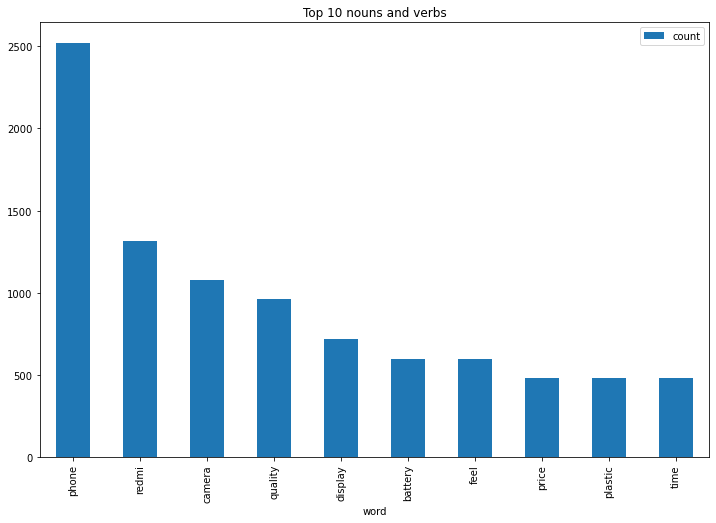

In [31]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

Emotion mining-sentiment analysis

In [32]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Don’t buy this product .Image quality is below average comparing with the specification.',
 'Useless camera.And there is NO RETURN POLICY and replacing with same mobile is big headache .DON’T buy this mobile Let’s make one thing clear immediately: the Xiaomi Redmi 9 is a phone with flaws, and it has a lot of them.',
 "On the other hand, it is one of the most affordable phones available anywhere right now, and it's hard to find a better phone at this price point.The screen is of barely acceptable quality, the camera is disappointing, and the performance is middling at best, and yet, the Redmi 9 counters these with its superb design, good feature set, long battery life, and finally, the biggest ace in its sleeve — the ultra-affordable pricing.",
 'Let that sink in — the Redmi 9 starts at less than 9000, This alone offsets all of the flaws that the phone has in store for us.',
 'Or does it?',
 "Let's look at the the many, many corners that have been cut to achieve this pricing🇩\xa0🇪\xa0

In [33]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0     Don’t buy this product .Image quality is below...
1     Useless camera.And there is NO RETURN POLICY a...
2     On the other hand, it is one of the most affor...
3     Let that sink in — the Redmi 9 starts at less ...
4                                           Or does it?
...                                                 ...
4195  Watching videos on YouTube feels like watching...
4196  And this phone is just downgraded phone by red...
4197  Good mobile Processor is bit slow, camera is b...
4198  I personally don't like MIUI because of lots o...
4199  But, good budget range phone if you ignore/adj...

[4200 rows x 1 columns]

In [35]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [36]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [37]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [41]:
# manual testing
calculate_sentiment(text='good')

3

In [42]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1      -1
2       9
3      -2
4       0
       ..
4195    7
4196    2
4197    5
4198    2
4199    2
Name: sentiment_value, Length: 4200, dtype: int64

In [43]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       13
1       41
2       74
3       28
4        3
        ..
4195    47
4196    55
4197    15
4198    12
4199    10
Name: word_count, Length: 4200, dtype: int64

In [44]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
903   Useless camera.And there is NO RETURN POLICY a...               -8   
2237  Useless camera.And there is NO RETURN POLICY a...               -8   
1549  Useless camera.And there is NO RETURN POLICY a...               -6   
1433  Useless camera.And there is NO RETURN POLICY a...               -6   
1775  Useless camera.And there is NO RETURN POLICY a...               -6   
...                                                 ...              ...   
600   On the other hand, it is one of the most affor...                9   
3432  On the other hand, it is one of the most affor...                9   
562   On the other hand, it is one of the most affor...                9   
3143  On the other hand, it is one of the most affor...                9   
2442  i didn't upload photo ....for any reason but i...               13   

      word_count  
903           54  
2237          54  
1549          68  
1433          68  
1775          68  
...          ...  
600           74  
3432          74  
562           74  
3143          74  
2442          73  

[4200 rows x 3 columns]

In [45]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    4200.000000
mean        1.541429
std         2.897420
min        -8.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        13.000000
Name: sentiment_value, dtype: float64

In [46]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0     Don’t buy this product .Image quality is below...                0   
1     Useless camera.And there is NO RETURN POLICY a...               -1   
3     Let that sink in — the Redmi 9 starts at less ...               -2   
4                                           Or does it?                0   
8     What’s more, plastic keeps the weight below 20...                0   
...                                                 ...              ...   
4184  You can also shoot at 2X, but don't get fooled...               -2   
4186           Awesome Very bad experience from Amazon.               -3   
4187              Very bad camera quality of the phone.               -3   
4192  There is no other phone available at this pric...               -1   
4193                     You should go ahead with this.                0   

      word_count  
0             13  
1             41  
3             28  
4              3  
8             22  
...          ...  
4184          16  
4186           6  
4187           7  
4192          14  
4193           6  

[1620 rows x 3 columns]

In [47]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2     On the other hand, it is one of the most affor...                9   
5     Let's look at the the many, many corners that ...                3   
6     The textured back of the Redmi 9 feels great i...                8   
7     I actually quite like the textured back of the...                5   
10    Overall, the Redmi 9 is a joy to handle, despi...                4   
...                                                 ...              ...   
4195  Watching videos on YouTube feels like watching...                7   
4196  And this phone is just downgraded phone by red...                2   
4197  Good mobile Processor is bit slow, camera is b...                5   
4198  I personally don't like MIUI because of lots o...                2   
4199  But, good budget range phone if you ignore/adj...                2   

      word_count  
2             74  
5             36  
6             27  
7             40  
10            28  
...          ...  
4195          47  
4196          55  
4197          15  
4198          12  
4199          10  

[2580 rows x 3 columns]

In [48]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0     Don’t buy this product .Image quality is below...                0   
1     Useless camera.And there is NO RETURN POLICY a...               -1   
2     On the other hand, it is one of the most affor...                9   
3     Let that sink in — the Redmi 9 starts at less ...               -2   
4                                           Or does it?                0   
...                                                 ...              ...   
4195  Watching videos on YouTube feels like watching...                7   
4196  And this phone is just downgraded phone by red...                2   
4197  Good mobile Processor is bit slow, camera is b...                5   
4198  I personally don't like MIUI because of lots o...                2   
4199  But, good budget range phone if you ignore/adj...                2   

      word_count  index  
0             13      0  
1             41      1  
2             74      2  
3             28      3  
4              3      4  
...          ...    ...  
4195          47   4195  
4196          55   4196  
4197          15   4197  
4198          12   4198  
4199          10   4199  

[4200 rows x 4 columns]

C:\Users\SATHISH KUMAR K\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

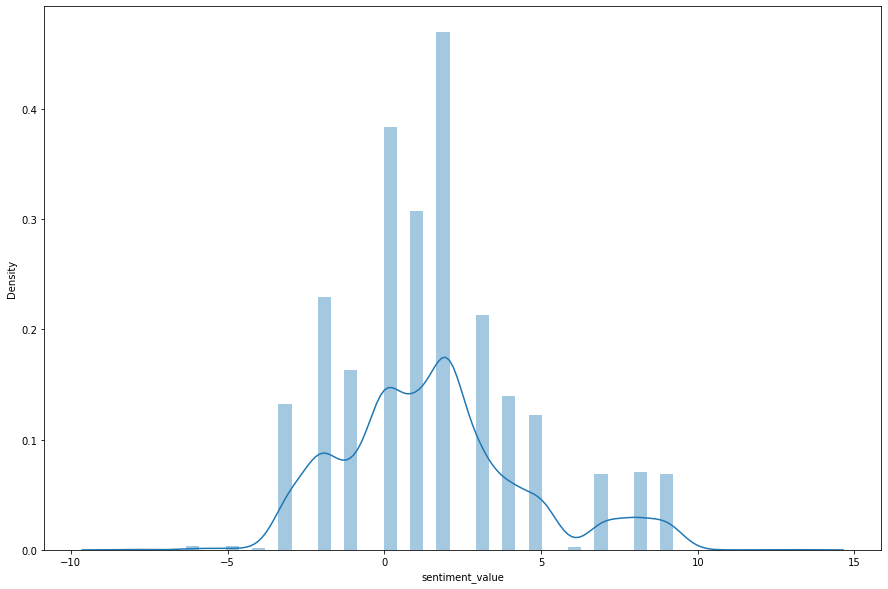

In [49]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

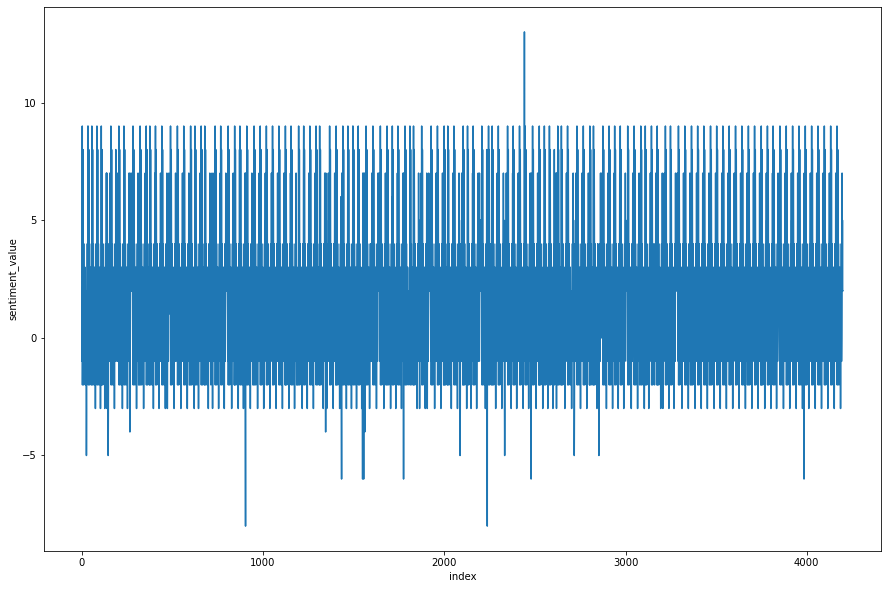

In [50]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)